# Behavioural analysis

## Preparing the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Loading the data:

In [4]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcvct'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

/Users/egor/Dropbox/Projects/mc/data/mcvct/mcvct_p0_s1_2016-10-18_1556
/Users/egor/Dropbox/Projects/mc/data/mcvct/mcvct_p0_s2_2016-10-25_1649
/Users/egor/Dropbox/Projects/mc/data/mcvct/mcvct_p0_s3_2016-10-25_1700
/Users/egor/Dropbox/Projects/mc/data/mcvct/mcvct_p1_s1_2016-10-25_1101
/Users/egor/Dropbox/Projects/mc/data/mcvct/mcvct_p1_s2_2016-10-25_1110
/Users/egor/Dropbox/Projects/mc/data/mcvct/mcvct_p1_s3_2016-10-25_1125
/Users/egor/Dropbox/Projects/mc/data/mcvct/mcvct_p2_s1_2016-10-25_1541
/Users/egor/Dropbox/Projects/mc/data/mcvct/mcvct_p2_s2_2016-10-25_1559
/Users/egor/Dropbox/Projects/mc/data/mcvct/mcvct_p2_s3_2016-10-25_1617
/Users/egor/Dropbox/Projects/mc/data/mcvct/mcvct_p3_s1_2016-10-26_1655
(960, 39)
Index([u'expName', u'time', u'participant', u'session', u'trialN', u'dirL', u'dirR', u'vL', u'vR', u'szL', u'szR', u'sfL', u'sfR', u'tfL', u'tfR', u'BvL', u'BvR', u'BsfL', u'BsfR', u'colorL', u'colorR', u'sat', u'fovGap', u'fovFade', u'periGap', u'periFade', u'trialT', u'nFrames'

Transforming the data set first.

In [5]:
ds['vDiffR'] = ds['vR'] - ds['vL']
ds['nfR'] = ds['nf000'] - ds['nf180']
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
ds.ix[ds['dirL']==0,'v000'] = ds['vL']
ds.ix[ds['dirR']==0,'v000'] = ds['vR']
ds.ix[ds['dirL']==180,'v180'] = ds['vL']
ds.ix[ds['dirR']==180,'v180'] = ds['vR']
print ds.head(5)
#df = pd.melt(ds, id_vars=['trialN','dirL','dirR','vL','vR','colorNameL','colorNameR','fovGap'],
#             value_vars=['pd000','pd090','pd180','pd270'])
#df = df.rename(columns={'variable': 'angle', 'value': 'predominance'})
#print df.head(5)

     expName             time  participant  session  trialN  dirL  dirR   vL  \
0  mcvct_bv0  2016-10-18_1556            0        1       1   180     0  0.6   
1  mcvct_bv0  2016-10-18_1556            0        1       2     0   180  1.2   
2  mcvct_bv0  2016-10-18_1556            0        1       3     0   180  4.8   
3  mcvct_bv0  2016-10-18_1556            0        1       4     0   180  4.8   
4  mcvct_bv0  2016-10-18_1556            0        1       5     0   180  2.4   

    vR  szL ...      pd000  pd090  pd180     pd270  qnResp    ringSz  vDiffR  \
0  4.8  256 ...   0.000000      0      0  0.016667       0      25.8     4.2   
1  2.4  256 ...   0.016667      0      0  0.000000       0  99.51429     1.2   
2  9.6  256 ...   0.016667      0      0  0.000000       0  136.3714     4.8   
3  0.3  256 ...   0.000000      0      0  0.016667       0  136.3714    -4.5   
4  0.0  256 ...   0.000000      0      0  0.016667       0  136.3714    -2.4   

   nfR  v000 v180  
0    0   4.8  0.6 

## Visualization

These plots show the speed at which the directional predominance was indicated the most (in terms of proportion).

In [6]:
sumR = ds.groupby(['v000','participant'], as_index=False)['nf000'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumL = ds.groupby(['v180','participant'], as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
g = sns.factorplot(x='v000', y='mean', col='participant', data=sumR, size=2)
g = sns.factorplot(x='v180', y='mean', col='participant', data=sumL, size=2)

ValueError: Could not interpret input 'mean'

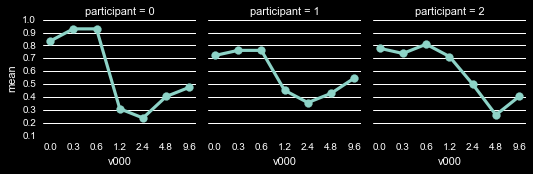

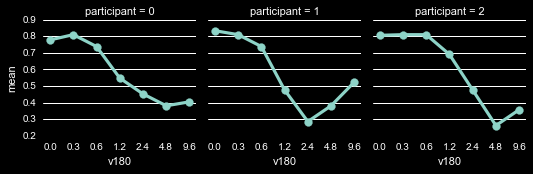

In [102]:
sumDR = ds.groupby(['v000','participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumDL = ds.groupby(['v180','participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
#sumDR['nf270','v000'] = sumDR['v000']
#sumDL['nf270','v180'] = sumDL['v180']
g = sns.factorplot(x='v000', y='mean', col='participant', data=sumDR, size=2.5)
g = sns.factorplot(x='v180', y='mean', col='participant', data=sumDL, size=2.5)

In [103]:
sumDR

,v000,participant,sum,mean,std,size
0,0.0,0,30,0.833333,0.377964,36
1,0.0,1,26,0.722222,0.454257,36
2,0.0,2,28,0.777778,0.421637,36
3,0.3,0,39,0.928571,0.260661,42
4,0.3,1,32,0.761905,0.431081,42
5,0.3,2,31,0.738095,0.445001,42
6,0.6,0,39,0.928571,0.260661,42
7,0.6,1,32,0.761905,0.431081,42
8,0.6,2,34,0.809524,0.397437,42
9,1.2,0,13,0.309524,0.467901,42


In [104]:
sumDL

,v180,participant,sum,mean,std,size
0,0.0,0,28,0.777778,0.421637,36
1,0.0,1,30,0.833333,0.377964,36
2,0.0,2,29,0.805556,0.401386,36
3,0.3,0,34,0.809524,0.397437,42
4,0.3,1,34,0.809524,0.397437,42
5,0.3,2,34,0.809524,0.397437,42
6,0.6,0,31,0.738095,0.445001,42
7,0.6,1,31,0.738095,0.445001,42
8,0.6,2,34,0.809524,0.397437,42
9,1.2,0,23,0.547619,0.503761,42


Looking at the instances of when the ring occurred vs. when it didn't (proportion), and large was the resulting ring in those instances (mean ring size).

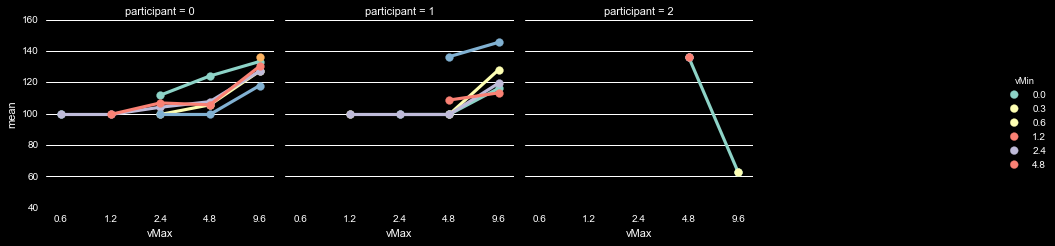

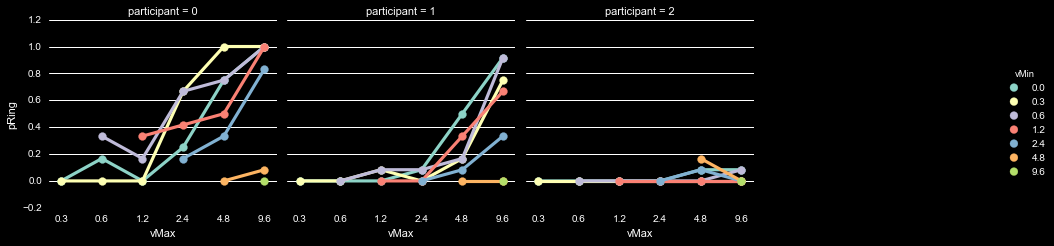

In [101]:
# Rewring the ring size column so that the minimum size is equated to zero:
ds.ix[ds['ringSz']==25.8,'ringSz'] = 0
# Creating columns for the slower and faster of the two speeds:
ds['vMin'] = np.amin([ds['vL'], ds['vR']], axis=0)
ds['vMax'] = np.amax([ds['vL'], ds['vR']], axis=0)
# Computing the proportion of instances when the ring has occurred:
sumMM_p = ds.groupby(['vMin','vMax','participant'],
                     as_index=False)['ringSz'].agg([np.count_nonzero, np.size]).reset_index()
sumMM_p['pRing'] = sumMM_p['count_nonzero'] / sumMM_p['size']
sumMM_p['vMin'] = sumMM_p['vMin']
sumMM_p['vMax'] = sumMM_p['vMax']
#print sumMM_p['ringSz']
# Getting the subset where the ring size is nonzero and computing the mean size:
ss = ds[ds.ringSz!=0]
sumMM_m = ss.groupby(['vMin','vMax','participant'], 
                     as_index=False)['ringSz'].agg([np.mean, np.std]).reset_index()
sumMM_m['vMin'] = sumMM_m['vMin']
sumMM_m['vMax'] = sumMM_m['vMax']
#print sumMM_m['ringSz']
# Plotting:
sns.factorplot(x='vMax', y='mean', hue='vMin', col='participant', data=sumMM_m, 
               col_wrap=4, size=3.5)
sns.factorplot(x='vMax', y='pRing', hue='vMin', col='participant', data=sumMM_p, 
               col_wrap=4, size=3.5)

Number of instances when the ring was indicated.

In [109]:
ds.groupby(['participant'],
                     as_index=False)['ringSz'].agg([np.count_nonzero, np.size]).reset_index()

,participant,count_nonzero,size
0,0,132.0,288.0
1,1,62.0,288.0
2,2,5.0,288.0


# Eye-tracking data

## Data import

In [18]:
subjEtPath = glob.glob(allSubjDirs[0] + '/' + 'data.asc')[0]
print subjEtPath
# Importing the data set the first time, with all the accompanying mess, for reading messages:
with open(subjEtPath) as f:
    mess = f.readlines()
# A cleaner import using cili to just read out the ET data:
from cili.util import *
from cili.cleanup import *
samps, events = load_eyelink_dataset(subjEtPath)
# Optional cleaning (probably not necessary):
#samps = interp_eyelink_blinks(samps, events, interp_fields=["pup_l"])
#samps = interp_zeros(samps, interp_fields=["pup_l"])
print samps.head(5)
print samps.columns
#print samps.ix[849896:849900]
# cili's native extraction of ranges for each event unfortunately doesn't work, although...
# ... I probably don't need it anyway:
#from cili.extract import extract_event_ranges
#ranges = extract_event_ranges(samps, events, end_offset=1000)
# With the 'messy' data set, creating a lookup table with the trial numbers and time stamps:
trialStr = [s for s in mess if 'TRIALID' in s]
trialTS = map(int,[s[s.index('\t')+1:s.index(' T')] for s in trialStr])
trialN = map(int,[s[s.index('D ')+2:s.index('\n')] for s in trialStr])
trialStartStr = [s for s in mess if 'START' in s]
trialStart = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialStartStr])
trialEndStr = [s for s in mess if 'END' in s]
trialEnd = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialEndStr])
trials = pd.DataFrame({'trialN':trialN, 'trialTS':trialTS, 'trialStartTS':trialStart,
                      'trialEndTS':trialEnd})
trials['trialLength'] = trials['trialEndTS'] - trials['trialStartTS']
trials = trials[['trialN', 'trialTS', 'trialStartTS', 'trialEndTS', 'trialLength']]
print np.max(trials['trialLength'])
#print trials.head(5)

/Users/Egor/Dropbox/Projects/mc/data/mcvct/mcvct_p0_s1_2016-10-18_1556/data.asc
          x_l    y_l   pup_l     x_r    y_r   pup_r
onset                                              
849896  946.6  353.0  6787.0  1108.2  353.0  6635.0
849898  946.6  353.0  6788.0  1108.3  353.0  6639.0
849900  946.9  353.0  6790.0  1108.4  353.0  6639.0
849902  946.9  353.0  6793.0  1108.5  353.0  6639.0
849904  946.6  353.0  6794.0  1108.5  353.0  6644.0
Index([u'x_l', u'y_l', u'pup_l', u'x_r', u'y_r', u'pup_r'], dtype='object')
8423


In [ ]:
# Creating my own ranges for each trial, with N number of samples:
#nSamples = 1500
#ranges = np.zeros((len(trialN),nSamples,6)) # 6 is for all six variables (L/R x,y,pup)
#print trialTS[0]
#print samps.ix[samps.ix>trialTS[0],0]
#print samps.index
#print samps.ix[int(trialTS[0]):int(trialTS[0])+600]
#print trialN
#trialStart = trialN # initiating a new variable to collect the 'actual' start
#trialEnd = trialN # the 'actual' end
#print trialN[-1] == 96
#for t in trialN:
    #print t
    # the actual start is the first data point following a trial time stamp:
    #trialStart[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t-1])]
    #trialStart[t-1] = 
    #print t==trialN[-1]
    #if t != 96: # trialN[-1]: #WHY DOESN'T THIS WORK?!
        #print trialTS[t]
        #trialEnd[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t])]
    #else:
        #trialEnd[t-1] = samps.index[-1]
    #end = trialStart[t-1]+nSamples
    #print end
    #ranges[t,:,:] = samps.ix[beg:end]
    #samps.ix[int(trialTS[int(t)-1]):int(trialTS[int(t)-1]+nSamples)]
#print trialStart
#print trialEnd